# What Is This Notebook?

this notebook is just one that I'm creating to reimplement my CNN for the CIFAR-10 dataset but using the functional API rather than Sequential.
I will create another one using the functional API again but also using transfer learning.

I know that the functional API isn't necessary for this implementation as I only have one output but I just want to get comfortable with the API.

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import cifar10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from keras.losses import SparseCategoricalCrossentropy

E0000 00:00:1727405964.710092      13 common_lib.cc:798] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:479
D0927 02:59:24.718226513      13 config.cc:196]                        gRPC EXPERIMENT call_status_override_on_cancellation   OFF (default:OFF)
D0927 02:59:24.718240421      13 config.cc:196]                        gRPC EXPERIMENT call_v3                                OFF (default:OFF)
D0927 02:59:24.718243761      13 config.cc:196]                        gRPC EXPERIMENT canary_client_privacy                  ON  (default:ON)
D0927 02:59:24.718246137      13 config.cc:196]                        gRPC EXPERIMENT capture_base_context                   ON  (default:ON)
D0927 02:59:24.718248510      13 config.cc:196]                        gRPC EXPERIMENT client_idleness                        ON  (defa

In [2]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
else:
    strategy = tf.distribute.MirroredStrategy()  # fallback to multi-GPU or single CPU/GPU

Running on TPU  
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


I0000 00:00:1727406057.821916      13 service.cc:145] XLA service 0x5a4e12b8e230 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727406057.821967      13 service.cc:153]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1727406057.821971      13 service.cc:153]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1727406057.821974      13 service.cc:153]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1727406057.821977      13 service.cc:153]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1727406057.821980      13 service.cc:153]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1727406057.821984      13 service.cc:153]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1727406057.821987      13 service.cc:153]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1727406057.821989      13 service.cc:153]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)
I

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train = X_train / 255
X_test = X_test / 255
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, random_state=0)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
with strategy.scope():
    inputs = keras.Input(shape=(32, 32, 3))

    # Conv layer 1
    x = layers.Conv2D(filters=512, kernel_size=3, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)
    x = layers.Dropout(.2924515218223497)(x)

    # Conv layer 2
    x = layers.Conv2D(filters=1024, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)
    x = layers.Dropout(.20420635555557912)(x)

    # Conv layer 3
    x = layers.Conv2D(filters=1024, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)
    x = layers.Dropout(.4938435933532547)(x)

    # Conv layer 4
    x = layers.Conv2D(filters=512, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPool2D(pool_size=(2, 2))(x)
    x = layers.Dropout(.477406309189756)(x)

    # Flatten and dense layers
    x = layers.Flatten()(x)
    x = layers.Dense(342, activation='relu')(x)
    x = layers.Dropout(.49155865824030837)(x)
    output = layers.Dense(10)(x)

    # Create and compile the model
    model = keras.Model(inputs=inputs, outputs=output, name='tpu_model')
    model.compile(
        optimizer='adam',
        loss=SparseCategoricalCrossentropy(from_logits=True),
        metrics=['sparse_categorical_accuracy']
    )

In [ ]:
keras.utils.plot_model(model, 'my_model.png', show_shapes=True, dpi=75)

In [9]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    patience=5,
    min_delta=.001,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping],
    epochs=100
)


Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 0.4825 - sparse_categorical_accuracy: 0.8355 - val_loss: 0.9554 - val_sparse_categorical_accuracy: 0.7400
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 0.4032 - sparse_categorical_accuracy: 0.8704 - val_loss: 0.6804 - val_sparse_categorical_accuracy: 0.7808
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 0.3976 - sparse_categorical_accuracy: 0.8661 - val_loss: 0.7519 - val_sparse_categorical_accuracy: 0.7640
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - loss: 0.3573 - sparse_categorical_accuracy: 0.8766 - val_loss: 0.7642 - val_sparse_categorical_accuracy: 0.7768
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 0.3382 - sparse_categorical_accuracy: 0.8823 - val_loss: 0.6276 - val_sparse_categorical_accuracy: 0.8000
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 0.3344 - sparse_categorical_accuracy: 0.8967 - val_loss: 0.6042 - val_sparse_cat

<Axes: >

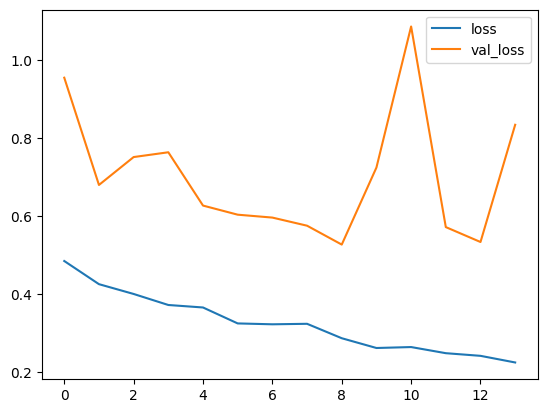

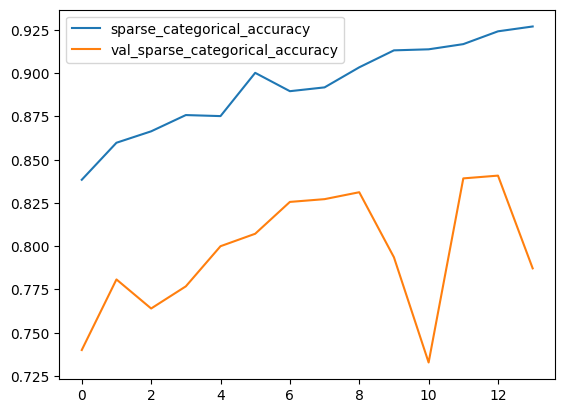

In [10]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot()

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.6206 - sparse_categorical_accuracy: 0.8325
0.5472931265830994
0.8424000144004822
